In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/ghrist/Desktop/discord-chat-analyser/discord-chat-analyzers/Data/news_ai.csv')


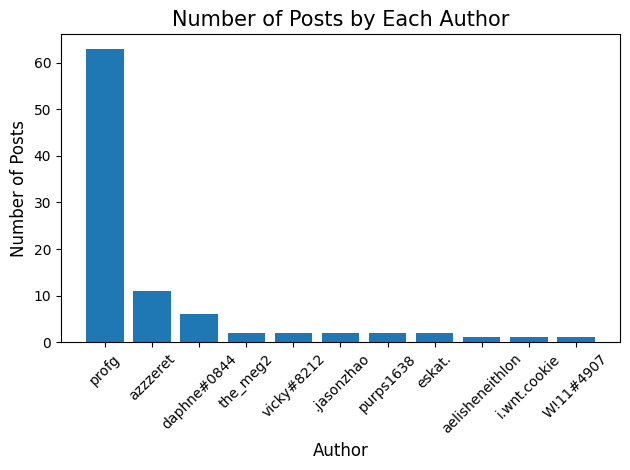

In [5]:
author_post_counts = df['Author'].value_counts()
plt.figure()
plt.bar(author_post_counts.index, author_post_counts.values)

plt.title('Number of Posts by Each Author', fontsize=15)
plt.xlabel('Author', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

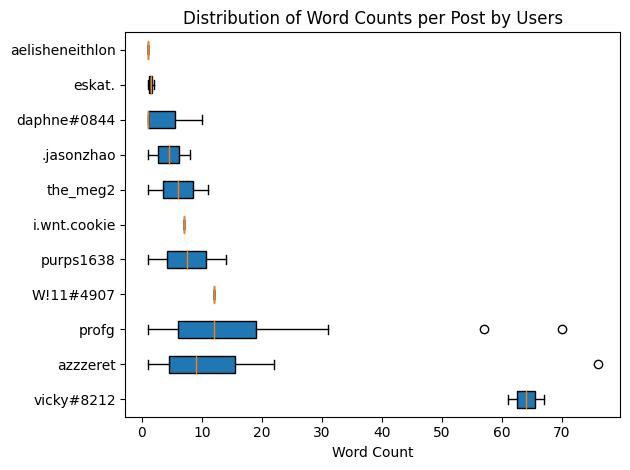

In [6]:
df['WordCount'] = df['Content'].apply(lambda x: len(str(x).split()))

average_word_counts = df.groupby('Author')['WordCount'].mean().sort_values(ascending=False)
word_counts_by_user_sorted = [df[df['Author'] == user]['WordCount'].tolist() for user in average_word_counts.index]

plt.figure()
plt.boxplot(word_counts_by_user_sorted, vert=False, patch_artist=True, boxprops=dict())
plt.title('Distribution of Word Counts per Post by Users')
plt.xlabel('Word Count')

plt.yticks(range(1, len(average_word_counts) + 1), average_word_counts.index)

plt.tight_layout()
plt.show()



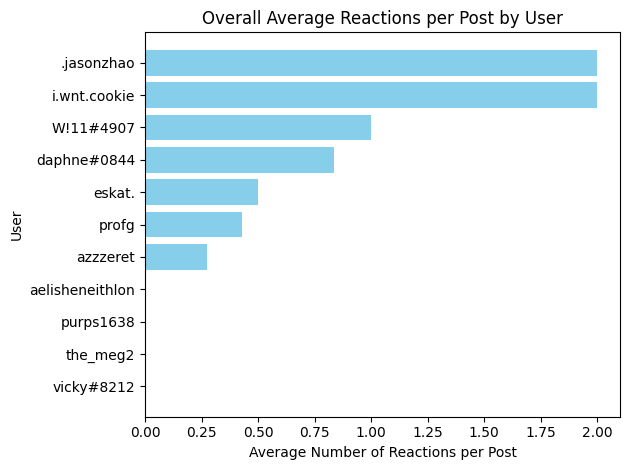

In [13]:
def total_reaction_count(reaction_str):
    if not isinstance(reaction_str, str):
        return 0
    
    total = 0
    num = ""
    for char in reaction_str:
        if char.isdigit():
            num += char
        elif num:
            total += int(num)
            num = ""
    
    if num:
        total += int(num)
        
    return total


df['Total_Reactions'] = df['Reactions'].apply(total_reaction_count)

user_avg_reactions = df.groupby('Author')['Total_Reactions'].mean()

user_avg_reactions = user_avg_reactions.sort_values(ascending=False)

plt.figure()
plt.barh(user_avg_reactions.index, user_avg_reactions.values, color='skyblue')
plt.xlabel('Average Number of Reactions per Post')
plt.ylabel('User')
plt.title('Overall Average Reactions per Post by User')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()